In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [54]:
economy = pd.read_excel("C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/BRICS_World_Bank_Indicators/BRICS_Economic_Data.xlsx")

In [55]:
top10depart_drop = pd.read_csv("C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/intern_tourism_demographics/top10depart_drop.csv") 

In [56]:
top10depart_RF = top10depart_drop.loc[top10depart_drop["Country_Name"]=="Russian Federation", :]

In [57]:
top10depart_RF

,Unnamed: 0,Country_Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,sum
4,200,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21329000.0,12260000.0,11182000.0,10635000.0,12631000.0,18371000.0,18030000.0,20428000.0,20572000.0,24507000.0,28416000.0,29107000.0,34285000.0,36538000.0,34276000.0,39323000.0,43726000.0,47813000.0,54069000.0,45889000.0,34550000.0,31659000.0,39629000.0,41964000.0,NaN,NaN,711189000.0


In [58]:
top10depart_RF_1995_2018 = top10depart_RF.drop(top10depart_RF.loc[:,'1960':'1994'].columns, axis=1)

In [59]:
top10depart_RF_1995_2018

,Unnamed: 0,Country_Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,sum
4,200,Russian Federation,21329000.0,12260000.0,11182000.0,10635000.0,12631000.0,18371000.0,18030000.0,20428000.0,20572000.0,24507000.0,28416000.0,29107000.0,34285000.0,36538000.0,34276000.0,39323000.0,43726000.0,47813000.0,54069000.0,45889000.0,34550000.0,31659000.0,39629000.0,41964000.0,NaN,NaN,711189000.0


In [60]:
top10depart_RF_1995_2018['Series_Name'] = ''

In [61]:
top10depart_RF_1995_2018=top10depart_RF_1995_2018.drop(['sum'], axis=1) 

In [62]:
top10depart_RF_1995_2018.insert(2, 'Series_Name', top10depart_RF_1995_2018.pop('Series_Name'))

In [63]:
top10depart_RF_1995_2018

,Unnamed: 0,Country_Name,Series_Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
4,200,Russian Federation,,21329000.0,12260000.0,11182000.0,10635000.0,12631000.0,18371000.0,18030000.0,20428000.0,20572000.0,24507000.0,28416000.0,29107000.0,34285000.0,36538000.0,34276000.0,39323000.0,43726000.0,47813000.0,54069000.0,45889000.0,34550000.0,31659000.0,39629000.0,41964000.0,NaN,NaN


In [64]:
top10depart_RF_1995_2018=top10depart_RF_1995_2018.drop(["Unnamed: 0"], axis=1) 

In [65]:
top10depart_RF_1995_2018

,Country_Name,Series_Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
4,Russian Federation,,21329000.0,12260000.0,11182000.0,10635000.0,12631000.0,18371000.0,18030000.0,20428000.0,20572000.0,24507000.0,28416000.0,29107000.0,34285000.0,36538000.0,34276000.0,39323000.0,43726000.0,47813000.0,54069000.0,45889000.0,34550000.0,31659000.0,39629000.0,41964000.0,NaN,NaN


In [66]:
top10depart_RF_1995_2018.to_csv("C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/intern_tourism_demographics/top10depart_RF_1995_2018.csv") 

In [67]:
e = economy.copy()

In [68]:
e = e.rename(columns={"Country Name": "Country_Name","Country Code": "Country_Code", "Series Name": "Series_Name", "Series Code": "Series_Code"})

In [69]:
e.Series_Name.unique()

array(['Adjusted net national income (annual % growth)',
       'Adjusted net national income (constant 2015 US$)',
       'Adjusted net national income (current US$)',
       'Adjusted net national income per capita (annual % growth)',
       'Adjusted net national income per capita (constant 2015 US$)',
       'Adjusted net national income per capita (current US$)',
       'Adjusted net savings, excluding particulate emission damage (% of GNI)',
       'Adjusted net savings, excluding particulate emission damage (current US$)',
       'Adjusted net savings, including particulate emission damage (% of GNI)',
       'Adjusted net savings, including particulate emission damage (current US$)',
       'Adjusted savings: carbon dioxide damage (% of GNI)',
       'Adjusted savings: carbon dioxide damage (current US$)',
       'Adjusted savings: consumption of fixed capital (% of GNI)',
       'Adjusted savings: consumption of fixed capital (current US$)',
       'Adjusted savings: education

In [70]:
e.columns = e.columns.str.replace(' \[YR\d+\]', '', regex=True)

In [71]:
e_RF = e.loc[e["Country_Name"] == "Russian Federation", :]

In [72]:
e_RF_1995_2018 = e_RF.drop(e_RF.loc[:,'1970':'1994'].columns, axis=1)

In [73]:
e_RF_1995_2018=e_RF_1995_2018.drop(['Country_Code','Series_Code'], axis=1) 

In [74]:
result = pd.concat([top10depart_RF_1995_2018, e_RF_1995_2018], axis=0)

In [75]:
result.head(3)

,Country_Name,Series_Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
4,Russian Federation,,2.132900e+07,1.226000e+07,1.118200e+07,1.063500e+07,1.263100e+07,1.837100e+07,1.803000e+07,2.042800e+07,2.057200e+07,2.450700e+07,2.841600e+07,2.910700e+07,3.428500e+07,3.653800e+07,3.427600e+07,3.932300e+07,4.372600e+07,4.781300e+07,5.406900e+07,4.588900e+07,3.455000e+07,3.165900e+07,3.962900e+07,4.196400e+07,NaN,NaN
1035,Russian Federation,Adjusted net national income (annual % growth),-9.048155e+00,1.985541e+01,3.861723e+00,-6.468579e+00,2.055290e+01,2.228079e+01,2.813224e+00,3.431939e+00,7.012078e+00,1.495875e+01,1.076905e+01,1.215958e+01,1.417725e+01,5.192849e+00,-1.760477e+01,1.187422e+01,9.579962e+00,4.070514e+00,-3.583093e-01,-4.215402e-01,-5.821866e+00,-3.745739e+00,3.171137e+00,6.400861e+00,6.528931e-01,NaN
1036,Russian Federation,Adjusted net national income (constant 2015 US$),3.287758e+11,3.940556e+11,4.092729e+11,3.827988e+11,4.614750e+11,5.642953e+11,5.801702e+11,6.000813e+11,6.421595e+11,7.382185e+11,8.177176e+11,9.171486e+11,1.047175e+12,1.101553e+12,9.076273e+11,1.015401e+12,1.112676e+12,1.157968e+12,1.153819e+12,1.148955e+12,1.082064e+12,1.041533e+12,1.074561e+12,1.143342e+12,1.150807e+12,NaN


In [76]:
result_melt = result.melt(id_vars=['Country_Name','Series_Name'], value_vars=['1995','1996','1997','1998','1999','2000','2001'
                                                                              ,'2002','2003','2004','2005','2006','2007','2008'
                                                                              ,'2009','2010','2011','2012','2013','2014','2015'
                                                                              ,'2016','2017','2018','2019','2020'], ignore_index=False)

In [77]:
result_melt.head(5)

,Country_Name,Series_Name,variable,value
4,Russian Federation,,1995,2.132900e+07
1035,Russian Federation,Adjusted net national income (annual % growth),1995,-9.048155e+00
1036,Russian Federation,Adjusted net national income (constant 2015 US$),1995,3.287758e+11
1037,Russian Federation,Adjusted net national income (current US$),1995,1.926982e+11
1038,Russian Federation,Adjusted net national income per capita (annua...,1995,-9.028463e+00


In [78]:
result_transpose = result.T

In [79]:
result_transpose.head(5) 

,4,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337,1338,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379
Country_Name,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federation,Russian Federatio

In [80]:
df=result_transpose.copy()

In [81]:
df.columns = df.columns.astype(str)

In [82]:
df = df.rename(columns={'4': 'dep4'})

In [83]:
df = df.drop(['Country_Name','Series_Name','2020'])

In [84]:
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

In [85]:
df.corrwith(df["dep4"],axis=0).sort_values()

1312   -0.947593
1309   -0.947593
1063   -0.915959
1316   -0.912144
1313   -0.912142
1311   -0.859615
1314   -0.830851
1223   -0.819617
1045   -0.813985
1377   -0.812075
1205   -0.780645
1061   -0.779460
1379   -0.758452
1360   -0.739159
1331   -0.730933
1202   -0.730933
1378   -0.725573
1222   -0.720540
1315   -0.712210
1237   -0.706520
1230   -0.691573
1261   -0.687360
1213   -0.683063
1113   -0.665369
1271   -0.660692
1366   -0.658984
1204   -0.652682
1047   -0.651195
1267   -0.637042
1229   -0.619559
1099   -0.611359
1373   -0.605312
1234   -0.576448
1087   -0.484846
1274   -0.481669
1374   -0.477876
1085   -0.469577
1224   -0.463347
1235   -0.460358
1203   -0.440462
1326   -0.428908
1081   -0.382174
1286   -0.378222
1288   -0.378222
1088   -0.363991
1232   -0.315779
1301   -0.305827
1263   -0.269290
1079   -0.262381
1038   -0.260512
1095   -0.252994
1035   -0.238468
1307   -0.214225
1241   -0.212542
1246   -0.201445
1358   -0.195194
1250   -0.135702
1345   -0.124639
1297   -0.1124

In [86]:
df_ind = df.reset_index()

In [87]:
df_ind.head(2)

,index,dep4,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337,1338,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379
0,1995,21329000.0,-9.048155,3.287758e+11,1.926982e+11,-9.028463,2215.831950,1298.717483,-25.060548,-9.827895e+10,-25.520418,-1.000824e+11,6.360993,2.494565e+10,47.934676,1.879835e+11,3.900000,1.529447e+10,2.635580,1.033585e+10,28.263631,0.292841,1.148422e+09,2.928421,0.0,0.0,-19.671134,-7.714350e+10,0.459870,1.803454e+09,6.692231,-8.0,3.689918e+10,2.257072e+12,9.560000e+10,2.647026e+10,3603.975610,3.806458e+12,6.230000e+10,1.724997e+10,4430000.0,4030000.0,8.510998,555448000.0,22.775363,25.867459,1.880458,7.437910e+09,6.331650,5.864184e+09,6.158458e+09,NaN,2.210000e+07,6.784257e+12,29.289011,11.537544,9.174315e+10,1.531967e+11,8.398657e+12,4.184000e+11,1.158489e+11,9.602127e+10,3.395117,NaN,4.850000e+10,1.342895e+10,31.128338,1.020970e+11,1.905000e+09,1.020970e+11,1.036032e+10,1.220746e+11,71.164457,-2.405731,4.550492e+11,2.954078e+13,1.016600e+12,2.814819e+11,NaN,NaN,16.842078,-1.459950e+09,0.522257,2.065720e+09,0.153154,605780000.0,7.214984e+11,4.521696e+13,1.428522e+12,3.955372e+11,-4.143528,4862.642272,304746.186534,9627.730568,2665.779867,-4.122774,13308.204909,5613.280647,1.974615e+12,8.328749e+11,1.428522e+12,19.075659,-1.100000,2.120910e+11,1.364512e+13,2.725000e+11,7.545132e+10,7.163256e+11,4.484217e+13,1.416345e+12,3.921656e+11,-4.495731,4827.779809,302220.242937,9545.662793,-4.475053,2640.0,13206.559311,5570.0,3.921450e+11,1.959534e+12,8.257754e+11,1.416345e+12,8.117581e+10,6.088517e+10,952260000.0,25.438878,-10.800000,1.962732e+11,1.293389e+13,3.634000e+11,1.006202e+11,4.360256e+13,28.835543,4.119221e+11,1.140553e+11,21.077728,-7.500000,1.386471e+11,9.127435e+12,3.011000e+11,8.337025e+10,18.741600,2.677279e+11,96.603336,6.513223e+11,4.247468e+13,1.380000e+12,3.821021e+11,3.248995,28.022709,28.263631,4.003106e+11,1.108402e+11,6.413216e+11,4.024125e+13,1.335100e+12,3.696700e+11,52.088799,4.816531,2.721042e+11,1.771990e+13,7.441000e+11,2.060306e+11,1836.555146,4.98998,7.040544e+11,3.775164e+11,7.441000e+11,1.523877e+09,0.0,294274279.1,25.893894,21.157115,8.109017e+10,9.197707e+10,5.997841e+12,3.699000e+11,1.024200e+11,8.873990e+10,34.539193,-4.551674,2.286377e+11,1.382524e+13,4.934000e+11,1.366154e+11,10339.997302,0.641316,0.358228,16.552856,15.193445,8.799371,1.143358e+11,6.710659e+12,1.645526e+12,5.248887e+10,29.1

In [88]:
result_transpose[[1209,1208,1037,1093,1040,1211,1143,1122,1190,1127,1356,1089]].iloc[1]

1209         Imports of goods and services (constant LCU)
1208    Imports of goods and services (constant 2015 US$)
1037           Adjusted net national income (current US$)
1093          Exports of goods and services (current US$)
1040    Adjusted net national income per capita (curre...
1211          Imports of goods and services (current US$)
1143                                    GNI (current US$)
1122                                    GDP (current US$)
1190    Gross value added at basic prices (GVA) (curre...
1127                         GDP per capita (current US$)
1356                  Services, value added (current US$)
1089     Exports of goods and services (BoP, current US$)
Name: Series_Name, dtype: object

In [89]:
melt_to_plot1 = result_melt[result_melt.index.isin([1089])]

In [90]:
melt_to_plot2 = result_melt[result_melt.index.isin([1040])]

In [91]:
melt_to_plot3 = result_melt[result_melt.index.isin([1208,1037,1093,1040,1211,1143,1122,1190,1127,1356,1089])]

In [92]:
melt_ind1 = melt_to_plot1.reset_index()

In [93]:
melt_ind2 = melt_to_plot2.reset_index()

In [94]:
melt_ind3 = melt_to_plot3.reset_index()

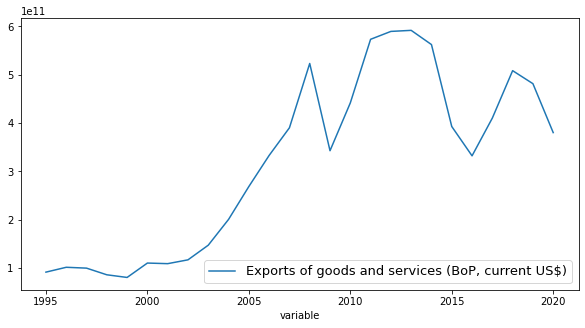

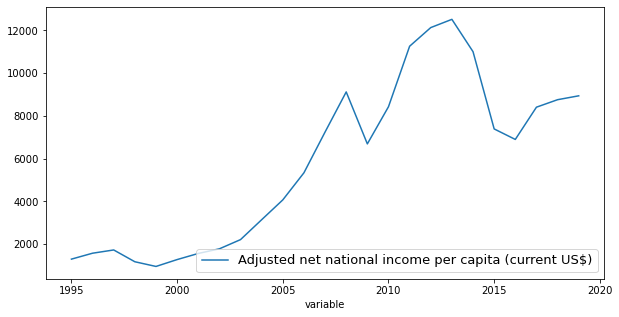

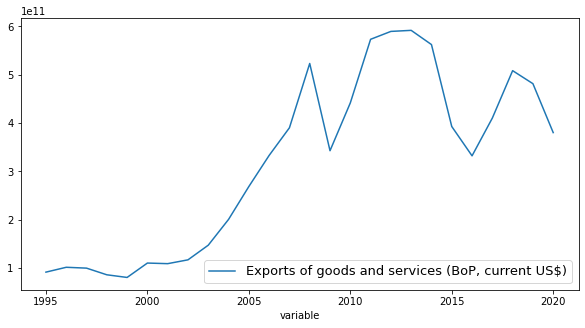

In [95]:
e_ch1 = melt_ind1.pivot(index = 'variable', columns='Series_Name', values='value')
e_ch1.plot(kind='line',figsize=(10,5))
ax = plt.subplot(111)
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(fontsize=13)
plt.savefig('C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/intern_tourism_demographics/e_RF_1.png',dpi=200
           ,bbox_inches='tight') 
e_ch2 = melt_ind2.pivot(index = 'variable', columns='Series_Name', values='value')
e_ch2.plot(kind='line',figsize=(10,5))
ax = plt.subplot(111)
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(fontsize=13)
plt.savefig('C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/intern_tourism_demographics/e_RF_2.png',dpi=200
           ,bbox_inches='tight') 
e_ch1 = melt_ind1.pivot(index = 'variable', columns='Series_Name', values='value')
e_ch1.plot(kind='line',figsize=(10,5))
ax = plt.subplot(111)
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(fontsize=13)

In [96]:
result_transpose[[1312,1309,1063,1316,1313,1311,1314,1223,1045,1377,1305]].iloc[1]

1312    Net primary income (Net income from abroad) (c...
1309                Net primary income (BoP, current US$)
1063    Agriculture, forestry, and fishing, value adde...
1316    Net secondary income (Net current transfers fr...
1313              Net secondary income (BoP, current US$)
1311    Net primary income (Net income from abroad) (c...
1314    Net secondary income (Net current transfers fr...
1223                Manufacturing, value added (% of GDP)
1045    Adjusted savings: carbon dioxide damage (% of ...
1377          Travel services (% of service exports, BoP)
1305    Net official flows from UN agencies, UNTA (cur...
Name: Series_Name, dtype: object

In [97]:
melt_neg1 = result_melt[result_melt.index.isin([1311,1309,1316,1313,1314])] 

In [98]:
melt_neg2 = result_melt[result_melt.index.isin([1089])] 

In [99]:
melt_plot1 = melt_neg1.reset_index()

In [100]:
melt_plot2 = melt_neg2.reset_index()

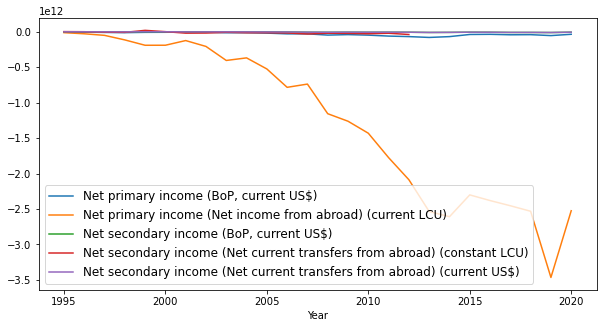

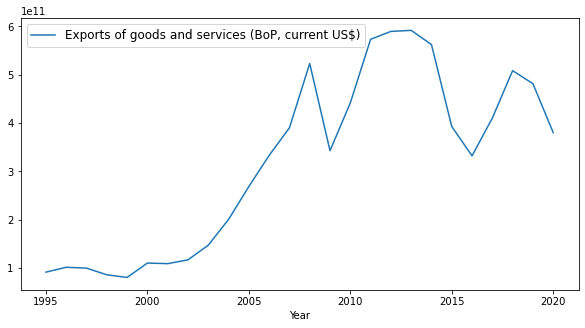

In [101]:
h_neg1 = melt_neg1.pivot(index = 'variable', columns='Series_Name', values='value')
h_neg1.plot(kind='line',figsize=(10,5))
ax = plt.subplot(111)
ax.set_xlabel('Year')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax.axvline(x=14, color='grey',ls='--') #2015=20, 2010=15
#ax.axvline(x=19, color='grey',ls='--')
ax.legend(fontsize=12)
h_neg2 = melt_neg2.pivot(index = 'variable', columns='Series_Name', values='value')
h_neg2.plot(kind='line',figsize=(10,5))
ax = plt.subplot(111)
ax.set_xlabel('Year')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax.axvline(x=14, color='grey',ls='--') #2015=20, 2010=15
#ax.axvline(x=19, color='grey',ls='--')
ax.legend(fontsize=12)
plt.savefig('C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/intern_tourism_demographics/e_exp_RF_1.png',dpi=200
           ,bbox_inches='tight')


In [103]:
melt_ind1.head(2)

,index,Country_Name,Series_Name,variable,value
0,1089,Russian Federation,"Exports of goods and services (BoP, current US$)",1995,9.174315e+10
1,1089,Russian Federation,"Exports of goods and services (BoP, current US$)",1996,1.017820e+11


In [104]:
m7 = melt_ind1.rename(columns={"variable":"year"})

In [107]:
df_ind_rename = df_ind.rename(columns={'index': 'year'})

In [109]:
dep4 = df_ind_rename[["dep4","year"]]

In [110]:
m7_dep4 = pd.concat(([m7,dep4]), axis = 1)

In [111]:
m7_dep4 = m7_dep4[:-1]

In [112]:
m7_dep4 = m7_dep4.iloc[:, :-1]

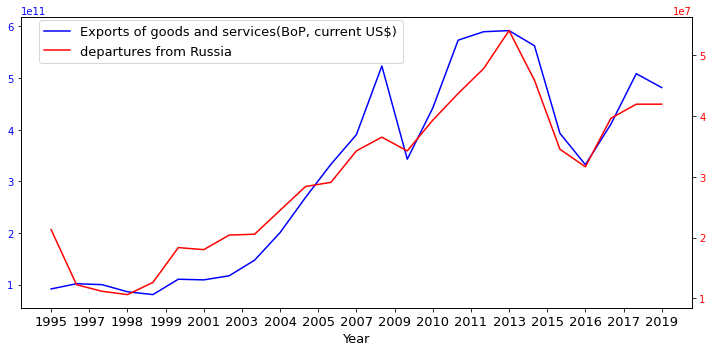

In [116]:
e_rf7 = m7_dep4.pivot(index = 'year', columns='Series_Name', values='value')
dep_rf = m7_dep4.pivot(index = 'year', columns='Series_Name', values='dep4')
fig, ax1 = plt.subplots(figsize=(10,5))
#ax.legend(fontsize=13)
ax1.set_xlabel('Year',fontsize=13)
plt.xticks(fontsize=13)
ax1.plot(e_rf7,color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
ax2.plot(dep_rf,color='r')
ax2.tick_params(axis='y', labelcolor='r')
fig.tight_layout()
fig.legend(['Exports of goods and services(BoP, current US$)', 'departures from Russia']
           , fontsize=13,loc='upper left',bbox_to_anchor=(0.05, 0.95))
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))
#plt.show()
#e_ch7.plot(kind='line',figsize=(10,5))
#ax = plt.subplot(111)
#ax.set_xlabel('Year')
##ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax.axvline(x=14, color='grey',ls='--') #2015=20, 2010=15
# ax.axvline(x=19, color='grey',ls='--')
# ax.legend(fontsize=13)
plt.savefig('C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/intern_tourism_demographics/e_dep_rf_1.png',dpi=200
            ,bbox_inches='tight') 